# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3


#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000
print(monthly_income)

12000



#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_current_price = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_current_price, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19098100,
            "id": 1,
            "last_updated": 1658282567,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 444581829159,
                    "percent_change_1h": 0.889048052801311,
                    "percent_change_24h": 5.63408763873268,
                    "percent_change_7d": 20.1985431069214,
                    "percentage_change_1h": 0.889048052801311,
                    "percentage_change_24h": 5.63408763873268,
                    "percentage_change_7d": 20.1985431069214,
                    "price": 23259.0,
                    "volume_24h": 52348834320
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19098100,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_current_price = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_current_price, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119746830,
            "id": 1027,
            "last_updated": 1658282558,
            "max_supply": 119746689,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 184742302031,
                    "percent_change_1h": 0.96229117110348,
                    "percent_change_24h": 1.21926523802067,
                    "percent_change_7d": 48.0042271343794,
                    "percentage_change_1h": 0.96229117110348,
                    "percentage_change_24h": 1.21926523802067,
                    "percentage_change_7d": 48.0042271343794,
                    "price": 1540.42,
                    "volume_24h": 24254147368
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119746830,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [20]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_current_price['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print (f"The current price of BTC is ${btc_price}")

The current price of BTC is $23259.0


In [19]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_current_price['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print (f"The current price of ETH is ${eth_price}")

The current price of ETH is $1540.42


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value =  btc_coins * btc_price

# Print current value of your holding in BTC
print (f"The current value of my BTC is ${btc_value:0.2f}") 

The current value of my BTC is $27910.80


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print (f"The current value of my ETH is ${eth_value:0.2f}")

The current value of my ETH is $8164.23


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print (f"The current cryptocurrency wallet balance is ${total_crypto_wallet:0.2f}")

The current cryptocurrency wallet balance is $36075.03


#### Review the total number of shares held in both (SPY) and (AGG).

In [22]:
# Setting current amount shares data.
spy_shares = 110
agg_shares = 200
shares_data = {"shares":[spy_shares, agg_shares]}

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [23]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_base_url = os.getenv('ALPACA_BASE_URL')

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    alpaca_base_url,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [24]:
# Setting the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Setting the timeframe to 1Day
timeframe = "1Day"

stock_portfolio_df = pd.DataFrame(shares_data, index=tickers)

display (stock_portfolio_df)
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# Set both the start and end date at the date of your prior weekday
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

,shares
SPY,110
AGG,200


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [25]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
stock_prices_df = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
stock_prices_df.head()
# Reorganize the DataFrame
# Separate ticker data
AGG = stock_prices_df[stock_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stock_prices_df[stock_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_prices_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
stock_prices_df.head()


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [26]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(stock_prices_df["AGG"]["close"])

# Print the AGG closing price
print (f"The AGG closing price is ${agg_close_price}")

The AGG closing price is $119.43


In [28]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(stock_prices_df["SPY"]["close"])

# Print the SPY closing price
print (f"The SPY closing price is ${spy_close_price}")

The SPY closing price is $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [29]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price  * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of your {agg_shares} AGG shares is ${agg_value:0.2f}")

The current value of your 200 AGG shares is $23886.00


In [30]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price  * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of your {spy_shares} SPY shares is ${spy_value:0.2f}")

The current value of your 110 SPY shares is $36802.70


In [31]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value
print(f"The total value of the entire portfolio is ${total_stocks_bonds:0.2f}")


The total value of the entire portfolio is $60688.70


In [32]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds+ total_crypto_wallet

# Print current cryptocurrency wallet balance
print (f"The total portfolio is ${total_portfolio:0.2f}")

The total portfolio is $96763.73


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [33]:
# Consolidate financial assets data into a Python list
portfolio_assets = {'Amount': [total_crypto_wallet, total_stocks_bonds]}
# Review the Python list savings_data
display (portfolio_assets)

{'Amount': [36075.026, 60688.7]}

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [34]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(portfolio_assets,index=['Crypto','Stock'])

# Display the savings_df DataFrame
display (savings_df)

,Amount
Crypto,36075.026
Stock,60688.700


In [35]:
# Calculate total amount of savings
total_savings = savings_df.sum().item()
display (total_savings)

96763.726

#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='Amount'>], dtype=object)

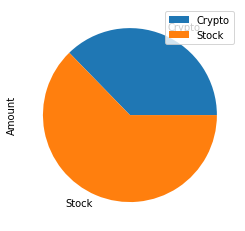

In [36]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie',y="Amount", subplots=True)

##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [37]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
print (emergency_fund_value)

36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [38]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_savings > emergency_fund_value:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund_value:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund_value - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')


Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [39]:
# Set start and end dates by using an end date of 2020-08-07 and work 3 years back from that date
start_date_Monte_Carlo = pd.Timestamp('2017-08-07', tz='America/New_York').isoformat()
end_date_Monte_Carlo = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
 
# Get 5 years' worth of historical data for SPY and AGG
start_date_five_years = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date_five_years = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

historical_data = api.get_bars(tickers, timeframe, start = start_date_five_years, end = end_date_five_years).df

# Separate ticker data
AGG = historical_data[historical_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = historical_data[historical_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
Monte_Carlo__five_years = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
Monte_Carlo__five_years.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       15562  108.754152  209.42  210.8200  209.1100   
2015-12-02 05:00:00+00:00       11581  108.684692  210.60  211.0000  208.2300   
2015-12-03 05:00:00+00:00       16801  108.040315  208.90  209.1500  204.7511   
2015-12-04 05:00:00+00:00        9796  108.192232  206.10  209.9700  205.9300   
2015-12-07 05:00:00+00:00        9104  108.460067  209.20  209.7295  207.2000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2015-12-01 05:00:00+00:00  210.68   97858418      337780  209.921410  
2015-12-02 05:00:00+00:00  208.54  108069059      367013  209.563055  
2015-12-03 05:00:00+00:00  205.58  166224154      546768  206.878936  
2015-12-04 05:00:00+00:00  209.66  192878747      556731  208.178631  
2015-12-07 05:00:00+00:00  208.27  102027111      374705  208.276128

In [40]:
# The tickers and timeframe parameters have been set in Part 1 of this activity 
# The start and end dates are be updated with the information set above and adding the df property to the end of the call so the response is returned as a DataFrame

Monte_Carlo_df = api.get_bars(tickers, timeframe, start = start_date_Monte_Carlo, end = end_date_Monte_Carlo).df

# Reorganize the DataFrame

# Separate ticker data
AGG = Monte_Carlo_df[Monte_Carlo_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = Monte_Carlo_df[Monte_Carlo_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
Monte_Carlo_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display (Monte_Carlo_df.head())
display (Monte_Carlo_df.tail())

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.87  1913253   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-08-07 04:00:00+00:00        7755  109.674876  247.50  247.87  247.37   
2017-08-08 04:00:00+00:00       12663  109.577636  247.49  248.91  246.83   
2017-08-09 04:00:00+00:00       11031  109.771749  246.46  247.31  246.06   
2017-08-10 04:00:00+00:00       12437  109.776611  246.30  246.44  243.70   
2017-08-11 04:00:00+00:00       10113  109.860974  244.00  244.80  243.75   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-08-07 04:00:00+00:00  247.87   31995021      100111  247.668698  
2017-08-08 04:00:00+00:00  247.26   61719353      192921  247.739709  
2017-08-09 04:00:00+00:00  247.25   62632619      223650  246.791421  
2017-08-10 04:00:00+00:00  243.76  120418270      424321  245.027847  
2017-08-11 04:00:00+00:00  244.12   74869947      278786  244.222867

AGG                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-08-03 04:00:00+00:00  119.37  119.40  119.1903  119.40  13014535   
2020-08-04 04:00:00+00:00  119.42  119.63  119.4200  119.63  10935181   
2020-08-05 04:00:00+00:00  119.39  119.49  119.3100  119.40  17377874   
2020-08-06 04:00:00+00:00  119.62  119.73  119.5300  119.57   4608710   
2020-08-07 04:00:00+00:00  119.66  119.73  119.3950  119.43   5559066   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-08-03 04:00:00+00:00       36359  119.282420  328.31  329.62  327.73   
2020-08-04 04:00:00+00:00       39114  119.541666  327.88  330.06  327.86   
2020-08-05 04:00:00+00:00       42313  119.387245  331.46  332.39  331.18   
2020-08-06 04:00:00+00:00       15938  119.604199  331.52  334.46  331.13   
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.30   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  328.79  53080454      288008  328.658804  
2020-08-04 04:00:00+00:00  330.06  41918004      250900  329.057593  
2020-08-05 04:00:00+00:00  332.11  42870955      241416  331.791643  
2020-08-06 04:00:00+00:00  334.33  43745653      290039  332.937218  
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [41]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY and running 500 samples.
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = Monte_Carlo_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
MC_thirty_years.portfolio_data.dropna().head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-08-08 04:00:00+00:00  109.67  109.6900  109.50  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.8700  109.66  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.8500  109.67  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.9400  109.68  109.87  1913253   
2017-08-14 04:00:00+00:00  109.84  109.8969  109.74  109.82  2294261   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-08 04:00:00+00:00       12663  109.577636    -0.000912  247.49   
2017-08-09 04:00:00+00:00       11031  109.771749     0.000913  246.46   
2017-08-10 04:00:00+00:00       12437  109.776611     0.001003  246.30   
2017-08-11 04:00:00+00:00       10113  109.860974     0.000820  244.00   
2017-08-14 04:00:00+00:00       10792  109.825015    -0.000455  245.55   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-08-08 04:00:00+00:00  248.91  246.83  247.26   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.25   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.76  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.12   74869947      278786   
2017-08-14 04:00:00+00:00  246.79  245.55  246.54   73291919      227671   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-08 04:00:00+00:00  247.739709    -0.002461  
2017-08-09 04:00:00+00:00  246.791421    -0.000040  
2017-08-10 04:00:00+00:00  245.027847    -0.014115  
2017-08-11 04:00:00+00:00  244.222867     0.001477  
2017-08-14 04:00:00+00:00  246.332178     0.009913

In [45]:
# Running the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\nayan\Fintech-Workspace\Challenge\Retirement_Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015037,0.997045,0.990197,0.998627,0.980769,1.015191,0.998256,1.015246,0.993675,1.001209,...,1.010624,1.005636,1.015973,0.999146,0.993640,0.997437,0.987924,1.004639,0.994419,0.989096
2,1.016892,0.995960,0.965960,0.993457,0.978562,1.016023,1.008816,1.012071,1.002430,1.015487,...,1.008932,0.998676,1.014315,0.994422,0.990975,0.997499,0.991644,1.012549,1.008345,0.986330
3,1.021406,1.010316,0.969529,1.006604,0.978344,1.013662,1.015698,1.019083,1.022156,1.027687,...,1.015712,0.992456,1.014271,0.999321,0.982608,0.991133,0.994795,1.011447,1.009557,0.979496
4,1.029643,1.018597,0.969024,1.002353,0.970763,1.014904,1.025288,1.027418,1.027111,1.027709,...,1.011442,1.003914,1.018304,1.002234,1.003020,0.983242,0.995165,1.005887,1.010387,0.981567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.963754,7.569581,9.214180,9.633607,15.697304,8.523906,18.986214,6.341160,192.376181,8.490788,...,24.283063,12.778623,10.248163,25.153982,10.334331,13.111081,28.911622,25.208561,9.879044,20.033635
7557,13.989708,7.674138,9.332294,9.702501,15.689719,8.483543,18.847990,6.302819,194.837573,8.568157,...,24.194120,12.856131,10.273346,25.129188,10.325866,13.167258,29.358926,25.186769,9.831099,20.000099
7558,13.886305,7.699770,9.165591,9.556916,15.795518,8.411089,18.849294,6.298245,195.330054,8.584129,...,24.209669,12.869664,10.231108,24.575397,10.330579,13.133356,29.444454,25.056237,9.873763,19.877852
7559,13.918916,7.667010,9.265532,9.691786,15.567162,8.393004,18.661197,6.375524,195.147775,8.437908,...,24.316837,12.924080,10.187761,24.843716,10.287510,13.057527,29.565074,25.225762,9.870252,20.122563


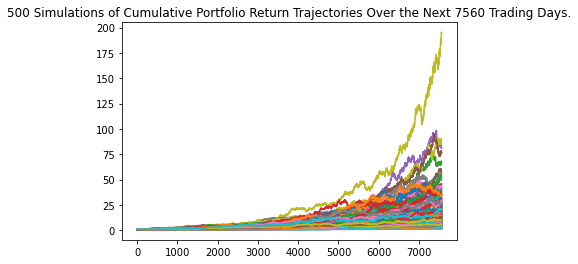

In [48]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC_line_plot = MC_thirty_years.plot_simulation()
MC_line_plot.get_figure().savefig("MC__sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

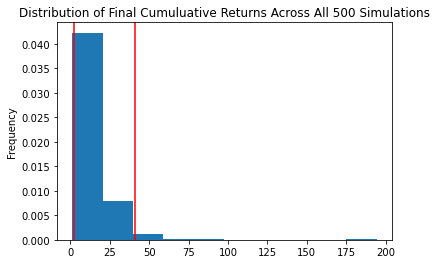

In [49]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_years.plot_distribution()
dist_plot.get_figure().savefig('MC_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [51]:
# Generating summary statistics from the 30-year Monte Carlo simulation results

summary = MC_thirty_years.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
display (summary)

count           500.000000
mean             14.062184
std              13.547839
min               1.190350
25%               6.785478
50%              10.791466
75%              16.879107
max             194.219473
95% CI Lower      2.615783
95% CI Upper     41.219789
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [52]:
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = float(summary[8] * total_stocks_bonds)
ci_upper_thirty_cumulative_return = float(summary[9] * total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% likelihood that your stock & bond portfolio will fall between ${ci_lower_thirty_cumulative_return: 0.2f} and ${ci_upper_thirty_cumulative_return: 0.2f} in 30 years")

There is a 95% likelihood that your stock & bond portfolio will fall between $ 158748.49 and $ 2501575.41 in 30 years


In [53]:
### Forecast Cumulative Returns in 10 Years

In [54]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_years = MCSimulation(
    portfolio_data = Monte_Carlo_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Printing the simulation input data
MC_ten_years.portfolio_data.dropna().head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-08-08 04:00:00+00:00  109.67  109.6900  109.50  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.8700  109.66  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.8500  109.67  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.9400  109.68  109.87  1913253   
2017-08-14 04:00:00+00:00  109.84  109.8969  109.74  109.82  2294261   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-08 04:00:00+00:00       12663  109.577636    -0.000912  247.49   
2017-08-09 04:00:00+00:00       11031  109.771749     0.000913  246.46   
2017-08-10 04:00:00+00:00       12437  109.776611     0.001003  246.30   
2017-08-11 04:00:00+00:00       10113  109.860974     0.000820  244.00   
2017-08-14 04:00:00+00:00       10792  109.825015    -0.000455  245.55   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-08-08 04:00:00+00:00  248.91  246.83  247.26   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.25   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.76  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.12   74869947      278786   
2017-08-14 04:00:00+00:00  246.79  245.55  246.54   73291919      227671   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-08 04:00:00+00:00  247.739709    -0.002461  
2017-08-09 04:00:00+00:00  246.791421    -0.000040  
2017-08-10 04:00:00+00:00  245.027847    -0.014115  
2017-08-11 04:00:00+00:00  244.222867     0.001477  
2017-08-14 04:00:00+00:00  246.332178     0.009913

In [55]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\nayan\Fintech-Workspace\Challenge\Retirement_Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001225,1.003187,0.994270,1.017482,1.006634,1.019249,1.015708,1.016419,0.992905,0.993273,...,0.993074,0.997712,0.992519,0.990346,0.995030,0.996597,1.004715,1.005640,1.005652,1.010479
2,1.001034,0.999475,0.978189,0.993289,1.027248,1.020014,1.021113,1.019856,1.017684,1.003881,...,0.989657,1.001670,1.017168,0.972436,0.995187,1.010276,1.021618,1.011240,1.008320,1.024847
3,1.008952,0.982326,0.980576,0.988252,0.999079,1.021554,1.023598,1.024076,1.020119,1.002577,...,1.007733,0.991059,1.012233,0.976478,1.004757,1.007796,1.014446,1.016427,0.995730,1.022534
4,1.012722,0.982933,0.969994,0.976402,0.995508,1.013976,1.031563,1.022256,1.016973,0.987198,...,1.007377,0.982112,0.994249,0.971789,0.999537,0.998859,1.036260,1.020761,1.005019,1.038492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.798677,1.536964,0.805694,2.891925,3.888757,1.985267,5.614833,2.966377,3.660675,0.866832,...,2.647576,6.080478,8.429671,3.640593,2.356004,1.730845,1.615107,3.274873,2.184871,4.078939
2517,2.750052,1.575492,0.818691,2.941309,3.912739,1.993016,5.643956,2.920813,3.695498,0.863943,...,2.630473,6.208385,8.366303,3.680730,2.321578,1.733784,1.638674,3.240908,2.219563,4.126930
2518,2.750527,1.586853,0.824577,3.007120,3.872619,1.995796,5.607651,2.962415,3.733715,0.856961,...,2.661103,6.096262,8.292558,3.726967,2.288285,1.738427,1.638882,3.249145,2.205804,4.082439
2519,2.752959,1.592918,0.816360,2.974558,3.883677,1.985076,5.612467,2.932464,3.683085,0.858662,...,2.616395,6.061757,8.198466,3.755348,2.275314,1.738876,1.621488,3.281778,2.259849,4.072926


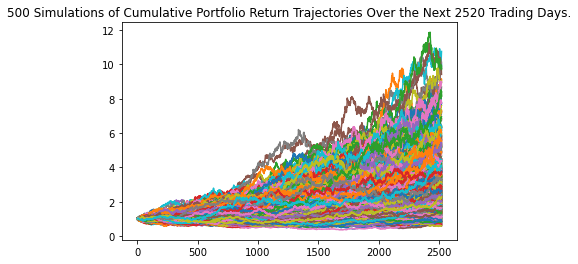

In [60]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
line_plot = MC_ten_years.plot_simulation()
line_plot.get_figure().savefig("MC_sim_plot.png", bbox_inches="tight")

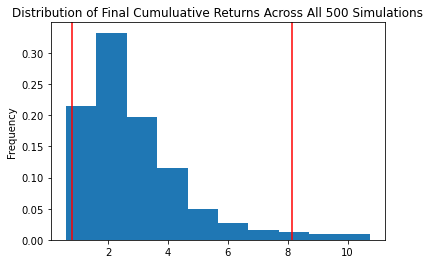

In [61]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
dist_plot = MC_ten_years.plot_distribution()
dist_plot.get_figure().savefig('MC_dist_plot.png',bbox_inches='tight')

In [62]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
summary_ten_years = MC_ten_years.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display (summary_ten_years)

count           500.000000
mean              2.910005
std               1.767626
min               0.590154
25%               1.748464
50%               2.441654
75%               3.599107
max              10.755287
95% CI Lower      0.796343
95% CI Upper      8.158140
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = float(summary_ten_years[8] * total_stocks_bonds)
ci_upper_ten_cumulative_return = float(summary_ten_years[9] * total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% likelihood that your stock & bond portfolio will fall between ${ci_lower_ten_cumulative_return: 0.2f} and ${ci_upper_ten_cumulative_return: 0.2f} in 10 years")


There is a 95% likelihood that your stock & bond portfolio will fall between $ 48329.02 and $ 495106.92 in 10 years


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?